In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/data/eCommerce3/' # 현준
#path = '/content/drive/MyDrive/data' # 호림
#path = '/content/drive/MyDrive/marketing_project' # 성용
#path = '/content/drive/MyDrive/data' # 가을
#path = '/content/drive/MyDrive/data' # 화영

os.chdir(path)

In [ ]:
# 데이터 불러오기
data_cleaned_df = pd.read_csv('capstone_data_cleaned.csv')

In [ ]:
# 데이터 상태 확인
data_cleaned_df.T

,0,1,2,3,4,5,6,7,8,9,...,119604,119605,119606,119607,119608,119609,119610,119611,119612,119613
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,9/4/2017 11:26,9/4/2017 11:26,8/15/2017 18:29,8/2/2017 18:24,...,5/17/2017 15:48,8/19/2017 18:28,8/15/2018 13:03,1/24/2018 2:23,3/2/2018 17:12,8/10/2017 21:21,8/10/2017 21:21,12/20/2017 9:52,3/9/2017 9:54,3/8/2018 20:57
order_approved_at,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,9/4/2017 11:43,9/4/2017 11:43,8/15/2017 20:05,8/2/2017 18:43,...,5/17/2017 16:15,8/19/2017 18:44,8/15/2018 13:15,1/25/2018 2:58,3/2/2018 17:49,8/10/2017 21:35,8/10/2017 21:35,12/20/2017 10:09,3/9/2017 9:54,3/9/2018 11:20
order_delivered_timestamp,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,9/5/2017 19:20,9/5/2017 19:20,8/18/2017 14:44,8/7/2017 18:30,...,5/29/2017 15:18,8/25/2017 16:05,8/17/2018 16:06,1/29/2018 23:33,3/16/2018 17:21,8/23/2017 15:36,8/23/2017 15:36,1/26/2018 15:45,3/17/2017 15:08,3/16/2018 13:08
order_estimated_delivery_date,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,9/15/2017 0:00,9/15/2017 0:00,8/28/2017 0:00,8/15/2017 0:00,...,6/8/2017 0:00,9/21/2017 0:00,8/21/2018 0:00,2/8/2018 0:00,3/21/2018 0:00,8/31/2017 0:00,8/31/2017 0:00,1/18/2018 0:00,3/28/2017 0:00,4/3/2018 0:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,1771297ac436903d1dd6b0e9279aa505,1771297ac436903d1dd6b0e9279aa505,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,...,e2aee0892199b1d92530e371abd825bf,2f73e04d12cdf0c945ded66bb3fcf6c7,31561f325664a8a7aba4c8d0c3a9b3db,fa1c13f2614d7b

In [ ]:
data_cleaned_df[data_cleaned_df['order_id'] == '00024acbcdf0a6daa1e931b038114c75'].T

,88307
order_id,00024acbcdf0a6daa1e931b038114c75
customer_id,af861d436cfc08b2c2ddefd0ba074622
order_purchase_timestamp,8/8/2018 10:00
order_approved_at,8/8/2018 10:10
order_delivered_timestamp,8/14/2018 13:32
order_estimated_delivery_date,8/20/2018 0:00
order_item_id,1
product_id,7634da152a4610f1595efa32f14722fc
seller_id,9d7a1d34a5052409006425275ba1c2b4
price,12.99


In [ ]:
data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119614 non-null  object 
 1   customer_id                    119614 non-null  object 
 2   order_purchase_timestamp       119614 non-null  object 
 3   order_approved_at              119614 non-null  object 
 4   order_delivered_timestamp      119614 non-null  object 
 5   order_estimated_delivery_date  119614 non-null  object 
 6   order_item_id                  119614 non-null  int64  
 7   product_id                     119614 non-null  object 
 8   seller_id                      119614 non-null  object 
 9   price                          119614 non-null  float64
 10  shipping_charges               119614 non-null  float64
 11  payment_type                   119614 non-null  object 
 12  payment_installments          

# 전처리

## 1. 데이터 타입 변경

In [ ]:
#item_id, customer_zip_code_prefix 숫자에서 문자열로 변경
data_cleaned_df['order_item_id'] = data_cleaned_df['order_item_id'].astype(str)
data_cleaned_df['customer_zip_code_prefix'] = data_cleaned_df['customer_zip_code_prefix'].astype(str)

# to_datetime
data_cleaned_df['order_purchase_timestamp'] = pd.to_datetime(data_cleaned_df['order_purchase_timestamp'])
data_cleaned_df['order_delivered_timestamp'] = pd.to_datetime(data_cleaned_df['order_delivered_timestamp'])
data_cleaned_df['order_approved_at']=pd.to_datetime(data_cleaned_df['order_approved_at'])
data_cleaned_df['order_estimated_delivery_date'] = pd.to_datetime(data_cleaned_df['order_estimated_delivery_date'])


# to_numeric
data_cleaned_df['order_item_id'] = pd.to_numeric(data_cleaned_df['order_item_id'], errors='coerce').astype(int)

In [ ]:
data_cleaned_df.T

,0,1,2,3,4,5,6,7,8,9,...,119604,119605,119606,119607,119608,119609,119610,119611,119612,119613
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-09-04 11:26:00,2017-09-04 11:26:00,2017-08-15 18:29:00,2017-08-02 18:24:00,...,2017-05-17 15:48:00,2017-08-19 18:28:00,2018-08-15 13:03:00,2018-01-24 02:23:00,2018-03-02 17:12:00,2017-08-10 21:21:00,2017-08-10 21:21:00,2017-12-20 09:52:00,2017-03-09 09:54:00,2018-03-08 20:57:00
order_approved_at,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-09-04 11:43:00,2017-09-04 11:43:00,2017-08-15 20:05:00,2017-08-02 18:43:00,...,2017-05-17 16:15:00,2017-08-19 18:44:00,2018-08-15 13:15:00,2018-01-25 02:58:00,2018-03-02 17:49:00,2017-08-10 21:35:00,2017-08-10 21:35:00,2017-12-20 10:09:00,2017-03-09 09:54:00,2018-03-09 11:20:00
order_delivered_timestamp,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-09-05 19:20:00,2017-09-05 19:20:00,2017-08-18 14:44:00,2017-08-07 18:30:00,...,2017-05-29 15:18:00,2017-08-25 16:05:00,2018-08-17 16:06:00,2018-01-29 23:33:00,2018-03-16 17:21:00,2017-08-23 15:36:00,2017-08-23 15:36:00,2018-01-26 15:45:00,2017-03-17 15:08:00,2018-03-16 13:08:00
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-09-15 00:00:00,2017-09-15 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00,...,2017-06-08 00:00:00,2017-09-21 00:00:00,2018-08-21 00:00:00,2018-02-08 00:00:00,2018-03-21 00:00:00,2017-08-31 00:00:00,2017-08-31 00:00:00,2018-01-18 00:00:00,2017-03-28 00:00:00,2018-04-03 00:00:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9

## 2. 파생변수 생성해서 컬럼 개수 줄이기

In [ ]:
# payment
data_cleaned_df['total_payment'] = data_cleaned_df['price'] + data_cleaned_df['shipping_charges']

#ppu
data_cleaned_df['ppu'] =  round(( data_cleaned_df['price'] - data_cleaned_df['shipping_charges'] )/ data_cleaned_df['order_item_id'] , 2)


# volume
data_cleaned_df['volume'] = data_cleaned_df['product_height_cm'] * data_cleaned_df['product_length_cm'] * data_cleaned_df['product_width_cm']

#deliverd_hours
data_cleaned_df['delivery_hours'] = (data_cleaned_df['order_delivered_timestamp'] - data_cleaned_df['order_purchase_timestamp']).dt.total_seconds() //3600

# 가장 최근 구매 건을 기준으로 해당 아이템의 구매가 얼마나 오래 되었는지 나타내는 # Recency column 추가
max_date = max(data_cleaned_df['order_purchase_timestamp']) #최근 구매
data_cleaned_df['Diff_days'] = (max_date - data_cleaned_df['order_purchase_timestamp']).dt.days + 1


# 안 쓰는 행 삭제
columns_to_remove = ['order_delivered_timestamp', 'order_purchase_timestamp', 'order_estimated_delivery_date', 'price',
                     'payment_value','customer_city','order_approved_at','product_length_cm','product_height_cm','product_width_cm']
commerce_df = data_cleaned_df.drop(columns=columns_to_remove)

## 3. `product_category_name` 컬럼 값 범주화

In [ ]:
commerce_df['product_category_name'].unique()

array(['housewares', 'baby', 'toys', 'audio', 'furniture_decor',
       'bed_bath_table', 'health_beauty', 'computers_accessories',
       'watches_gifts', 'electronics', 'air_conditioning',
       'sports_leisure', 'stationery', 'garden_tools',
       'construction_tools_construction', 'small_appliances', 'telephony',
       'luggage_accessories', 'construction_tools_safety', 'perfumery',
       'home_appliances_2', 'office_furniture', 'home_construction',
       'fashion_underwear_beach', 'musical_instruments', 'pet_shop',
       'costruction_tools_garden', 'cool_stuff', 'home_appliances',
       'auto', 'market_place', 'home_confort', 'party_supplies',
       'industry_commerce_and_business', 'fashion_bags_accessories',
       'fashion_shoes', 'fixed_telephony', 'books_general_interest',
       'consoles_games', 'furniture_living_room',
       'kitchen_dining_laundry_garden_furniture', 'food', 'drinks',
       'construction_tools_lights', 'christmas_supplies',
       'tablets_printi

In [ ]:
# 카테고리 컬럼 변수 줄이기
electronics =  [
        "audio", "computers_accessories", "electronics",
        "telephony", "tablets_printing_image", "computers", "cine_photo",
        "dvds_blu_ray", "fixed_telephony","consoles_games"]


food = ["food", "drinks", "food_drink", "la_cuisine"]


toys = ["toys"]

home_appliances =[ "home_appliances", "home_appliances_2" ]

furniture = [
        "housewares", "furniture_decor", "bed_bath_table",
        "kitchen_dining_laundry_garden_furniture",
        "furniture_living_room", "furniture_bedroom",
        "furniture_mattress_and_upholstery", "home_confort", "home_comfort_2",
        "office_furniture"]

construction = ["costruction_tools_tools", "construction_tools_lights","construction_tools_safety", "home_construction", "construction_tools_construction"]

fashion_beauty = [
        "fashion_bags_accessories", "fashion_shoes", "fashion_male_clothing", "watches_gifts",
        "fashio_female_clothing", "fashion_childrens_clothes",
        "fashion_underwear_beach", "fashion_sport","cool_stuff", "health_beauty", "perfumery","luggage_accessories","sports_leisure"
    ]

baby_products = [ "baby","diapers_and_hygiene"]

arts_hobbies =  [ "art", "arts_and_craftmanship", "music", "musical_instruments",
                "books_general_interest", "books_technical", "books_imported",
        "christmas_supplies", "stationery", "party_supplies","garden_tools","flowers","costruction_tools_garden"]

industry = ["industry_commerce_and_business", "agro_industry_and_commerce", "market_place"]

security = ["signaling_and_security", "security_and_services" ]
others = ["pet_shop","auto"]


In [ ]:
# retail['product_category_name'] 컬럼을 새로운 카테고리로 분류

def categorize_product(row):
    if row in electronics:
        return 'electronics'
    elif row in food:
        return 'food'
    elif row in toys:
        return 'toys'
    elif row in home_appliances:
        return 'home_appliances'
    elif row in furniture:
        return 'furniture'
    elif row in construction:
        return 'construction'
    elif row in fashion_beauty:
        return 'fashion_beauty'
    elif row in baby_products:
        return 'baby_products'
    elif row in arts_hobbies:
        return 'arts_hobbies'
    elif row in industry:
        return 'industry'
    elif row in security:
        return 'security'
    else:
        return 'others'

# categorize_product 적용
commerce_df['category'] = commerce_df['product_category_name'].apply(categorize_product)
commerce_df = commerce_df.drop(columns='product_category_name')

In [ ]:
commerce_df['category'].unique()

array(['furniture', 'baby_products', 'toys', 'electronics',
       'fashion_beauty', 'others', 'arts_hobbies', 'construction',
       'home_appliances', 'industry', 'food', 'security'], dtype=object)

## 4. `payment_type` 컬럼 범주화

In [ ]:
# payment_type unique value 리스트
payment_list = sorted(commerce_df['payment_type'].unique())
payment_list

['credit_card', 'debit_card', 'voucher', 'wallet']

>
    1. commerce_df의 `order_id`, `payment_type` 컬럼만 뽑아서
    2. `order_id` 로 그룹하고
    3. id 별로 묶인`payment_type`들을 set() 에 넣어서 중복 없게 만들고
    4. 위에서 만든 payment_type 순으로 정렬
    5. '/'.join 으로 이어 붙임

In [ ]:
# 그룹화된 payment_type을 sorted된 순서로 결합
payment_type_df = (
    commerce_df[['order_id', 'payment_type']]
    .groupby('order_id')['payment_type']
    .apply(lambda x: '/'.join(sorted(set(x), key=lambda y: payment_list.index(y))))
    .reset_index()
)
payment_type_df

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [ ]:
# payment_type 잘 바뀌었는지 확인
payment_type_df['payment_type'].unique()

array(['credit_card', 'wallet', 'credit_card/voucher', 'debit_card',
       'voucher', 'credit_card/debit_card'], dtype=object)

In [ ]:
# id 별 payment_type 테이블 완성
payment_type_df

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [ ]:
# commerce_df 에 있는 payment_type 을 지우고 order_id로 groupby
temp = commerce_df.drop(columns='payment_type')
grouped_by_id_commerce = temp.groupby('order_id').first().reset_index()

# 아까 만든 id 별 payment_type 테이블과 join
merged_df = payment_type_df.merge(grouped_by_id_commerce, on='order_id', how='left')

# 결과 확인
merged_df.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
shipping_charges,13.29,17.87,12.79,18.14,12.69,11.85,70.75,11.65,11.4,8.88,...,44.02,10.96,22.06,34.19,20.03,43.41,36.53,16.95,8.72,12.79
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605


## 5. 분석 대상을 최근 구매 1년 이하 고객들로 축소

In [ ]:
merged_df =merged_df[merged_df['Diff_days'] <= 365 ]
merged_df.T

,0,1,2,5,6,7,8,9,10,11,...,92916,92917,92918,92920,92921,92922,92923,92924,92925,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,00063b381e2406b52ad429470734ebd5,0006ec9db01a64e59a68b2c340bf65a7,...,fff8287bbae429a99bb7e8c21d151c41,fff90cdcb3b2e6cfb397d05d562fd3fe,fffa82886406ccf10c7b4e35c4ff2788,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,3fb97204945ca0c01bcf3eee6031c5f1,7ed0ea20347f67fe61d1c99fdf8556ae,...,028c09f007292c4e3a3b10d296e47987,0e1dad535a5b2359a2ff0a7d475ffb86,2a3ab9bf9639491997586882c502540a,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,f177554ea93259a5b282f24e33f65ab6,99a4788cb24856965c36a24e339b6058,...,bee2e070c39f3dd2f6883a17a5f0da45,764292b2b0f73f77a0272be03fdd45f3,bbe7651fef80287a816ead73f065fc4b,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,8602a61d680a10a82cceeeda0d99ea3d,4a3ca9315b744ce9f8e9374361493884,...,4e922959ae960d389249c378d1c939f5,bd23da7354813347129d751591d1a6e2,8f2ce03f928b567e3d56181ae20ae952,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,f7ccf836d21b2fb1de37564105216cc1
shipping_charges,13.29,17.87,12.79,11.85,70.75,11.65,11.4,8.88,12.98,23.32,...,48.14,11.83,44.02,22.06,34.19,20.03,43.41,36.53,16.95,12.79
payment_installments,2,5,2,1,10,3,1,3,5,4,...,4,1,7,1,1,3,1,1,3,1
product_weight_g,650.0,3050.0,200.0,200.0,13805.0,2000.0,850.0,950.0,200.0,1383.0,...,175.0,750.0,2700.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,600.0
customer_zip_code_prefix,28013,35661,12952,16700,11702,11075,6636,13419,15910,21810,...,58075,4119,59955,28540,56912,39401,65077,81690,4039,18605


# 이상치 제거

## orders 테이블에서 `물건구매`가 되기 전 `주문 승인`이 된 건을 이상치로 판단하고 제거.
1. 물건구매가 일어나기 전 주문 승인이 된 건의 주문ID를 구한다
2. 해당 아이디를 merged_df table 에서 제거한다.

In [ ]:
orders = pd.read_csv('orders.csv')
orders.dropna(subset=['order_approved_at','order_delivered_timestamp'],inplace=True)

# 데이터 형식 바꾸기
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors = 'coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors = 'coerce')
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'], errors = 'coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors = 'coerce')


# 날짜 데이터 이상치확인
# 역방향이면 이상치로 의심
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp'])
]

#이상치 개수 확인
print(len(Check_date_outliers))

61


In [ ]:
out_ids = Check_date_outliers['order_id'].unique().tolist()
out_ids[:5]

['58d4c4747ee059eeeb865b349b41f53a',
 '4df92d82d79c3b52c7138679fa9b07fc',
 '6e57e23ecac1ae881286657694444267',
 'f222c56f035b47dfa1e069a88235d730',
 'cf72398d0690f841271b695bbfda82d2']

In [ ]:
# 'order_id' 열의 값이 out_ids에 포함된 행 삭제
merged_cleaned_df = merged_df[~merged_df['order_id'].isin(out_ids)]

생각나는 가설
- 물건 형태에 따라서 구매하는 고객이 달라지냐?
- 구매 경향 파악은 두 번 이상 구매구매 고객으로 걸러야.?
-

In [ ]:
merged_cleaned_df.T

,0,1,2,5,6,7,8,9,10,11,...,92916,92917,92918,92920,92921,92922,92923,92924,92925,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,00063b381e2406b52ad429470734ebd5,0006ec9db01a64e59a68b2c340bf65a7,...,fff8287bbae429a99bb7e8c21d151c41,fff90cdcb3b2e6cfb397d05d562fd3fe,fffa82886406ccf10c7b4e35c4ff2788,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,3fb97204945ca0c01bcf3eee6031c5f1,7ed0ea20347f67fe61d1c99fdf8556ae,...,028c09f007292c4e3a3b10d296e47987,0e1dad535a5b2359a2ff0a7d475ffb86,2a3ab9bf9639491997586882c502540a,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,f177554ea93259a5b282f24e33f65ab6,99a4788cb24856965c36a24e339b6058,...,bee2e070c39f3dd2f6883a17a5f0da45,764292b2b0f73f77a0272be03fdd45f3,bbe7651fef80287a816ead73f065fc4b,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,8602a61d680a10a82cceeeda0d99ea3d,4a3ca9315b744ce9f8e9374361493884,...,4e922959ae960d389249c378d1c939f5,bd23da7354813347129d751591d1a6e2,8f2ce03f928b567e3d56181ae20ae952,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,f7ccf836d21b2fb1de37564105216cc1
shipping_charges,13.29,17.87,12.79,11.85,70.75,11.65,11.4,8.88,12.98,23.32,...,48.14,11.83,44.02,22.06,34.19,20.03,43.41,36.53,16.95,12.79
payment_installments,2,5,2,1,10,3,1,3,5,4,...,4,1,7,1,1,3,1,1,3,1
product_weight_g,650.0,3050.0,200.0,200.0,13805.0,2000.0,850.0,950.0,200.0,1383.0,...,175.0,750.0,2700.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,600.0
customer_zip_code_prefix,28013,35661,12952,16700,11702,11075,6636,13419,15910,21810,...,58075,4119,59955,28540,56912,39401,65077,81690,4039,18605


***
***

# Runtime 5분!!!!!
주석처리 해놓고 넘어가기!

***
***

In [ ]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(merged_cleaned_df.drop('customer_id', axis=1), hue='category', aspect=1.5)
plt.show()

# 군집분석

## 1. 분석 진행할 컬럼 선택, 범주형 데이터 인코딩

In [ ]:
# 클러스터링 할 컬럼 지정
#feature_names = ['payment_type','product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days']
#feature_names = ['payment_type','Diff_days', 'total_payment', 'volume', 'category', 'Diff_days']
#feature_names = ['payment_type','product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days']
feature_names = ['product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days']


#벡터기반 뉴클리드 거리 기반으로 속성 6개 따오는 거니까 컬럼 6개, pCA 6개 다르다
# 지정된 컬럼으로 새로운 dataframe 생성
from sklearn.preprocessing import OneHotEncoder
merged_df_f = pd.DataFrame(merged_cleaned_df , columns=feature_names)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
columns_to_encode = ['category']


# 원-핫 인코딩 수행
encoded_data = encoder.fit_transform(merged_df_f[columns_to_encode])

# 원-핫 인코딩된 컬럼 이름 생성
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# 기존 컬럼과 병합 (인코딩 제외한 나머지 컬럼 추가)
merged_result = pd.concat([merged_df_f.drop(columns=columns_to_encode).reset_index(drop=True), encoded_df], axis=1)
merged_result.T

,0,1,2,3,4,5,6,7,8,9,...,71984,71985,71986,71987,71988,71989,71990,71991,71992,71993
product_weight_g,650.00,3050.00,200.00,200.00,13805.00,2000.0,850.00,950.00,200.00,1383.00,...,175.00,750.00,2700.00,200.00,350.00,1050.00,10150.0,8950.00,967.00,600.00
total_payment,72.19,216.87,25.78,31.75,880.75,157.6,65.39,68.87,57.98,97.32,...,228.14,101.73,273.92,39.96,89.19,139.88,343.4,386.53,116.85,55.79
volume,3528.00,14157.00,2400.00,2700.00,118125.00,5760.0,1827.00,17500.00,2816.00,20000.00,...,8000.00,9900.00,13500.00,2250.00,2464.00,5120.00,53400.0,44460.00,9576.00,1710.00
Diff_days,351.00,228.00,22.00,263.00,57.00,163.0,59.00,158.00,33.00,36.00,...,166.00,279.00,254.00,152.00,306.00,72.00,129.0,47.00,310.00,81.00
category_arts_hobbies,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
category_baby_products,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
category_construction,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00
category_electronics,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
category_fashion_beauty,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00
category_food,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


## 2. 수치형 변수 스케일링

In [ ]:
# 원핫 인코딩되지 않은 컬럼 선택
columns_to_scale = merged_result.columns.difference(encoded_columns)

# 스케일링 대상 데이터 추출
data_to_scale = merged_result[columns_to_scale]

# StandardScaler 초기화 및 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# 스케일링 결과를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=merged_result.index)

# 스케일링된 데이터와 원핫 인코딩된 데이터 병합
final_result = pd.concat([scaled_df, merged_result[encoded_columns]], axis=1)

final_result.T  # 최종 결과 출력 (전치하여 확인)

#클러스터 번호 나왔을 건데. 이 데이터 프레임의 맨 마지막 컬럼에 클러스터 번호를 붙여주세요

,0,1,2,3,4,5,6,7,8,9,...,71984,71985,71986,71987,71988,71989,71990,71991,71992,71993
Diff_days,1.767165,0.536938,-1.523444,0.887002,-1.173379,-0.113183,-1.153375,-0.163192,-1.413423,-1.383418,...,-0.083177,1.047032,0.796986,-0.223203,1.317082,-1.023351,-0.453246,-1.273397,1.357089,-0.933334
product_weight_g,-0.398171,0.551158,-0.576170,-0.576170,4.805340,0.135827,-0.319060,-0.279505,-0.576170,-0.108230,...,-0.586059,-0.358616,0.412714,-0.576170,-0.516837,-0.239950,3.359591,2.884926,-0.272781,-0.417949
total_payment,-0.470614,0.771623,-0.869094,-0.817835,6.471759,0.262725,-0.528999,-0.499119,-0.592622,-0.254845,...,0.868388,-0.216980,1.261459,-0.747343,-0.324650,0.110579,1.858021,2.228339,-0.087159,-0.611425
volume,-0.545418,0.087835,-0.612621,-0.594748,6.282021,-0.412440,-0.646760,0.287004,-0.587837,0.435948,...,-0.278986,-0.165788,0.048692,-0.621558,-0.608808,-0.450570,2.425847,1.893222,-0.185091,-0.653730
category_arts_hobbies,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_baby_products,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_construction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
category_electronics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_fashion_beauty,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_food,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 3. PCA 진행

In [ ]:
from sklearn.decomposition import PCA

# 주성분 개수를 판단하기 위한 pca임의 시행

# pca = PCA(n_components=2)
pca = PCA(n_components=2)
pca.fit(final_result)

# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지
pca.explained_variance_ratio_.sum()

0.6646802195658718

In [ ]:
# pca 시행
pca_df = pca.fit_transform(final_result)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2'])
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])

# Show the first 5 firms
pca_df.head()

,PC1,PC2
0,-0.703414,1.804100
1,0.762097,0.394129
2,-1.197619,-1.364399
3,-1.039043,0.998520
4,9.711653,-2.078549


## scree plot으로 초기 K값 참고

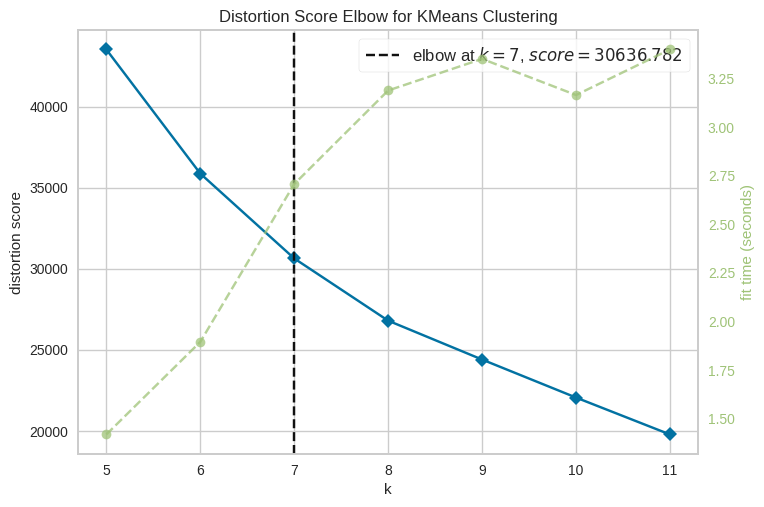

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# k-means 알고리즘 활용을 위한 라이브러리 import
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인
model = KMeans(n_init= 20, random_state=42)

# k 값의 범위를 조정해 줄 수 있습니다.
visualizer = KElbowVisualizer(model, k=(5,12))

# 데이터 적용
visualizer.fit(pca_df)
visualizer.show()

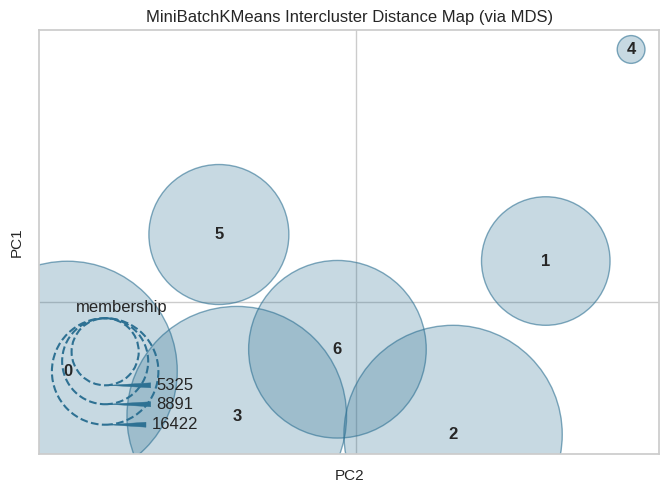

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=7, random_state=42))

In [ ]:
# 초기 k 값 참고를 위한 distance map 라이브러리 import
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans

#그룹의 갯수를 지정해 줄 수 있습니다. 저는 7로 적어두었습니다.
intercluster_distance(MiniBatchKMeans(7, random_state=42), pca_df)

In [ ]:
#  KMEANS
# 군집개수(n_cluster)는 7,초기 중심 설정방식 랜덤,
kmeans = KMeans(n_clusters=7, random_state=42, init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기
labels = kmeans.labels_

# 이제 pca_df의 마지막 컬럼(Cluster)에는 각 데이터 포인트가 속한 클러스터 번호가 포함되어 있습니다.
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

# PCA 데이터프레임에 클러스터 번호 추가
pca_df['Cluster'] = labels

In [ ]:
pca_df

,PC1,PC2,Cluster
0,-0.703414,1.804100,0
1,0.762097,0.394129,2
2,-1.197619,-1.364399,3
3,-1.039043,0.998520,0
4,9.711653,-2.078549,1
...,...,...,...
71989,-0.455593,-1.050493,3
71990,4.478885,-0.705947,1
71991,3.932089,-1.588714,1
71992,-0.256908,1.347134,0


In [ ]:
# 군집별 비중 확인
clusters = pca_df['Cluster'].value_counts().to_dict()

for i,j in clusters.items():
    print("{} : {}%".format(i,round(j/len(pca_df)*100,2)))

6 : 26.57%
3 : 23.42%
0 : 19.63%
2 : 12.2%
4 : 9.12%
5 : 5.71%
1 : 3.34%


In [ ]:
final_result.T

,0,1,2,3,4,5,6,7,8,9,...,71984,71985,71986,71987,71988,71989,71990,71991,71992,71993
Diff_days,1.767165,0.536938,-1.523444,0.887002,-1.173379,-0.113183,-1.153375,-0.163192,-1.413423,-1.383418,...,-0.083177,1.047032,0.796986,-0.223203,1.317082,-1.023351,-0.453246,-1.273397,1.357089,-0.933334
product_weight_g,-0.398171,0.551158,-0.576170,-0.576170,4.805340,0.135827,-0.319060,-0.279505,-0.576170,-0.108230,...,-0.586059,-0.358616,0.412714,-0.576170,-0.516837,-0.239950,3.359591,2.884926,-0.272781,-0.417949
total_payment,-0.470614,0.771623,-0.869094,-0.817835,6.471759,0.262725,-0.528999,-0.499119,-0.592622,-0.254845,...,0.868388,-0.216980,1.261459,-0.747343,-0.324650,0.110579,1.858021,2.228339,-0.087159,-0.611425
volume,-0.545418,0.087835,-0.612621,-0.594748,6.282021,-0.412440,-0.646760,0.287004,-0.587837,0.435948,...,-0.278986,-0.165788,0.048692,-0.621558,-0.608808,-0.450570,2.425847,1.893222,-0.185091,-0.653730
category_arts_hobbies,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_baby_products,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_construction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
category_electronics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_fashion_beauty,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_food,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<ipython-input-102-a607aa46f387>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_result.loc[:,'Cluster'] = pca_df['Cluster']


<Axes: >

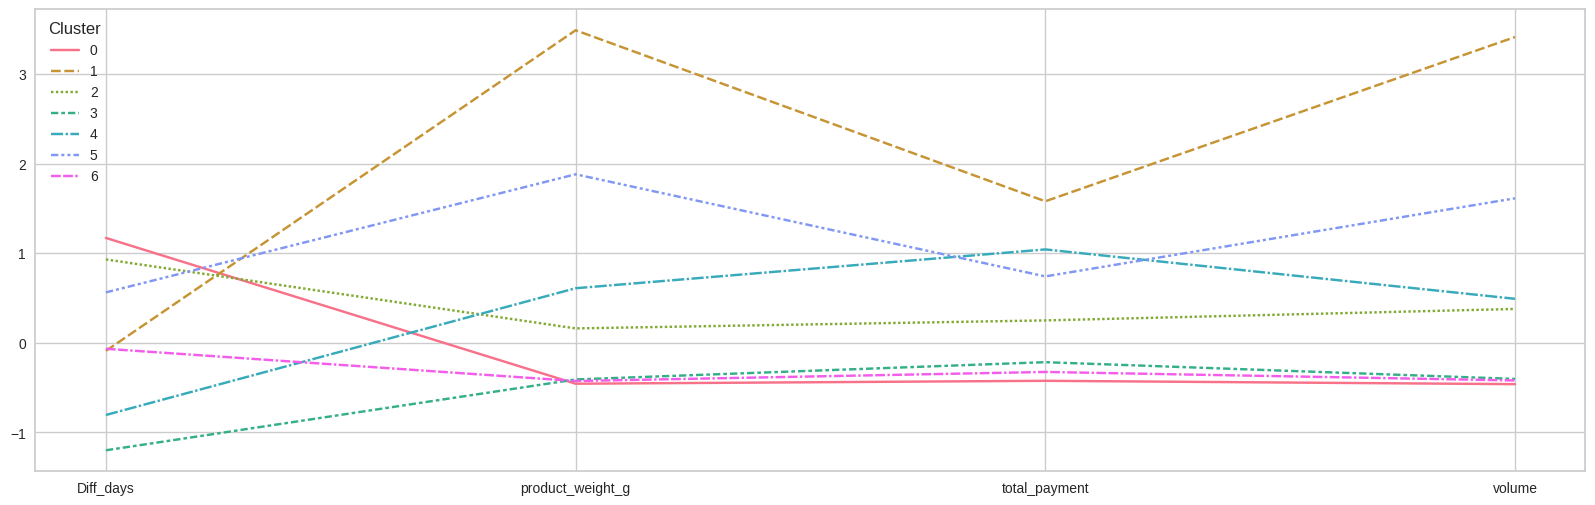

In [ ]:
# 수치형 컬럼만 클러스터별로 groupby mean
numeric_result = final_result[list(set(feature_names) - set(columns_to_encode))]
numeric_result.loc[:,'Cluster'] = pca_df['Cluster']
numeric_result_mean =numeric_result.groupby(['Cluster']).mean(numeric_only=True)

plt.figure(figsize=(20,6))
sns.lineplot(numeric_result_mean.T)

<Axes: >

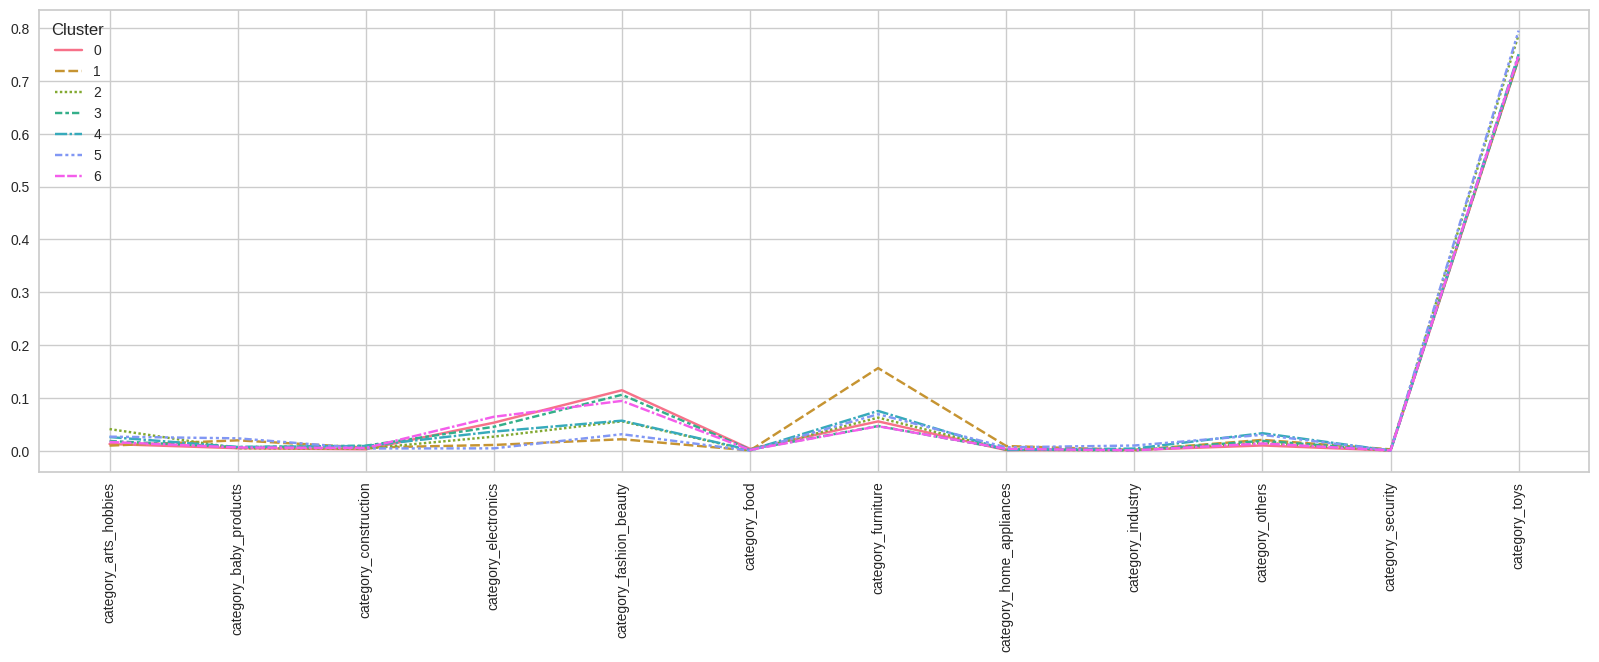

In [ ]:
## 범주형 컬럼만 클러스터별로 groupby mean
newmeric = list(set(feature_names) - set(columns_to_encode))
categorical_result = final_result.drop(columns=newmeric)
categorical_result['Cluster'] = pca_df['Cluster']
categorical_result_mean =categorical_result.groupby(['Cluster']).mean(numeric_only=True)
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.lineplot(categorical_result_mean.T)

In [ ]:
final_result.T

,0,1,2,3,4,5,6,7,8,9,...,71984,71985,71986,71987,71988,71989,71990,71991,71992,71993
Diff_days,1.767165,0.536938,-1.523444,0.887002,-1.173379,-0.113183,-1.153375,-0.163192,-1.413423,-1.383418,...,-0.083177,1.047032,0.796986,-0.223203,1.317082,-1.023351,-0.453246,-1.273397,1.357089,-0.933334
product_weight_g,-0.398171,0.551158,-0.576170,-0.576170,4.805340,0.135827,-0.319060,-0.279505,-0.576170,-0.108230,...,-0.586059,-0.358616,0.412714,-0.576170,-0.516837,-0.239950,3.359591,2.884926,-0.272781,-0.417949
total_payment,-0.470614,0.771623,-0.869094,-0.817835,6.471759,0.262725,-0.528999,-0.499119,-0.592622,-0.254845,...,0.868388,-0.216980,1.261459,-0.747343,-0.324650,0.110579,1.858021,2.228339,-0.087159,-0.611425
volume,-0.545418,0.087835,-0.612621,-0.594748,6.282021,-0.412440,-0.646760,0.287004,-0.587837,0.435948,...,-0.278986,-0.165788,0.048692,-0.621558,-0.608808,-0.450570,2.425847,1.893222,-0.185091,-0.653730
category_arts_hobbies,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_baby_products,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_construction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
category_electronics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_fashion_beauty,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_food,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# merged_cleaned_df 에 Cluster 컬럼 추가 ( 레이블링 )
merged_cleaned_df.loc[:, 'Cluster'] = pca_df['Cluster']
merged_cleaned_df.T

<ipython-input-105-16c19e018f1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned_df.loc[:, 'Cluster'] = pca_df['Cluster']


,0,1,2,5,6,7,8,9,10,11,...,92916,92917,92918,92920,92921,92922,92923,92924,92925,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,00063b381e2406b52ad429470734ebd5,0006ec9db01a64e59a68b2c340bf65a7,...,fff8287bbae429a99bb7e8c21d151c41,fff90cdcb3b2e6cfb397d05d562fd3fe,fffa82886406ccf10c7b4e35c4ff2788,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,3fb97204945ca0c01bcf3eee6031c5f1,7ed0ea20347f67fe61d1c99fdf8556ae,...,028c09f007292c4e3a3b10d296e47987,0e1dad535a5b2359a2ff0a7d475ffb86,2a3ab9bf9639491997586882c502540a,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,f177554ea93259a5b282f24e33f65ab6,99a4788cb24856965c36a24e339b6058,...,bee2e070c39f3dd2f6883a17a5f0da45,764292b2b0f73f77a0272be03fdd45f3,bbe7651fef80287a816ead73f065fc4b,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,8602a61d680a10a82cceeeda0d99ea3d,4a3ca9315b744ce9f8e9374361493884,...,4e922959ae960d389249c378d1c939f5,bd23da7354813347129d751591d1a6e2,8f2ce03f928b567e3d56181ae20ae952,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,f7ccf836d21b2fb1de37564105216cc1
shipping_charges,13.29,17.87,12.79,11.85,70.75,11.65,11.4,8.88,12.98,23.32,...,48.14,11.83,44.02,22.06,34.19,20.03,43.41,36.53,16.95,12.79
payment_installments,2,5,2,1,10,3,1,3,5,4,...,4,1,7,1,1,3,1,1,3,1
product_weight_g,650.0,3050.0,200.0,200.0,13805.0,2000.0,850.0,950.0,200.0,1383.0,...,175.0,750.0,2700.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,600.0
customer_zip_code_prefix,28013,35661,12952,16700,11702,11075,6636,13419,15910,21810,...,58075,4119,59955,28540,56912,39401,65077,81690,4039,18605


In [ ]:
merged_cleaned_df

,order_id,payment_type,customer_id,order_item_id,product_id,seller_id,shipping_charges,payment_installments,product_weight_g,customer_zip_code_prefix,customer_state,total_payment,ppu,volume,delivery_hours,Diff_days,category,Cluster
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,871766c5855e863f6eccc05f988b23cb,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,13.29,2,650.0,28013,RJ,72.19,45.61,3528.0,182.0,351,toys,0.0
1,000229ec398224ef6ca0657da4fc703e,credit_card,3818d81c6709e39d06b2738a8d3a2474,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,17.87,5,3050.0,35661,MG,216.87,181.13,14157.0,190.0,228,toys,2.0
2,00024acbcdf0a6daa1e931b038114c75,credit_card,af861d436cfc08b2c2ddefd0ba074622,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.79,2,200.0,12952,SP,25.78,0.20,2400.0,147.0,22,toys,3.0
5,00054e8431b9d7675808bcb819fb4a32,credit_card,635d9ac1680f03288e72ada3a1035803,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,11.85,1,200.0,16700,SP,31.75,8.05,2700.0,202.0,263,toys,6.0
6,000576fe39319847cbb9d288c5617fa6,credit_card,fda4476abb6307ab3c415b7e6d026526,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,70.75,10,13805.0,11702,SP,880.75,739.25,118125.0,121.0,57,arts_hobbies,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92922,fffbee3b5462987e66fb49b1c5411df2,credit_card,ecc3d4eb9b17d2f0865d21f2abecc51c,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,20.03,3,1050.0,39401,MG,139.88,99.82,5120.0,392.0,72,construction,NaN
92923,fffc94f6ce00a00581880bf54a75a037,wallet,0c9aeda10a71f369396d0c04dce13a64,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,43.41,1,10150.0,65077,MA,343.40,256.58,53400.0,416.0,129,furniture,NaN
92924,fffcd46ef2263f404302a634eb57f7eb,wallet,0da9fe112eae0c74d3ba1fe16de0988b,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,36.53,1,8950.0,81690,PR,386.53,313.47,44460.0,226.0,47,toys,NaN
92925,fffce4705a9662cd70adb13d4a31832d,credit_card,cd79b407828f02fdbba457111c38e4c4,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,16.95,3,967.0,4039,SP,116.85,82.95,9576.0,115.0,310,toys,NaN


## RFM Visualization

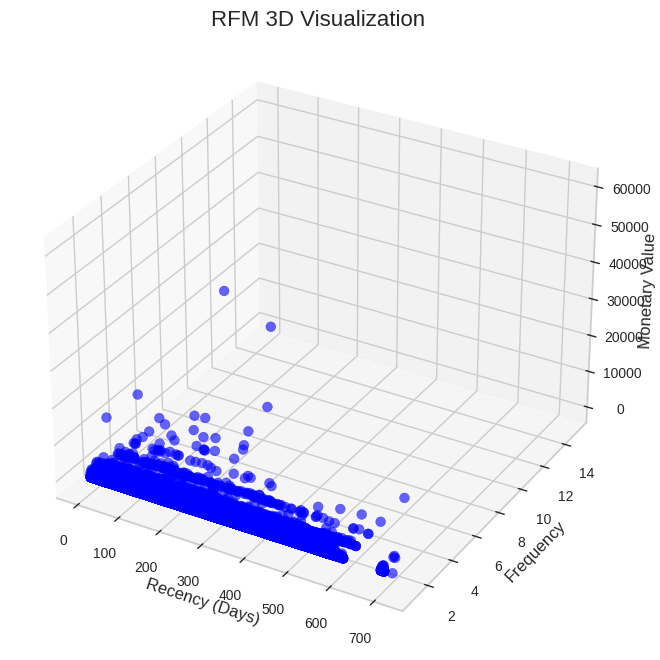

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 경로
#base_path = 'K:\\SPARTA\\학습자료\\Python\\marketing_project\\'
base_path = path # 현준

# CSV 파일 로드
customers = pd.read_csv(base_path + 'customers.csv')
order_items = pd.read_csv(base_path + 'order_items.csv')
#orders = pd.read_csv(base_path + 'orders.csv')
#payments = pd.read_csv(base_path + 'payments.csv')
#products = pd.read_csv(base_path + 'products.csv')

# 필요한 데이터 병합
orders_items_merged = pd.merge(order_items, orders, on='order_id', how='inner')
data = pd.merge(orders_items_merged, customers, on='customer_id', how='inner')

#Recency 계산

# 날짜 변환
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 기준 날짜 (최신 주문일 기준)
latest_date = orders['order_purchase_timestamp'].max()

# Recency 계산
recency = orders.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days
}).reset_index()
recency.rename(columns={'order_purchase_timestamp': 'Recency'}, inplace=True)

# Frequency 계산
frequency = orders.groupby('customer_id').agg({
    'order_id': 'nunique'
}).reset_index()
frequency.rename(columns={'order_id': 'Frequency'}, inplace=True)

# 주문 금액 계산
order_items['monetary'] = order_items['order_item_id'] * order_items['price']

# Monetary 계산
monetary = order_items.groupby('order_id').agg({'monetary': 'sum'}).reset_index()
monetary_customer = pd.merge(monetary, orders[['order_id', 'customer_id']], on='order_id', how='inner')

# 고객별 총 금액 계산
monetary = monetary_customer.groupby('customer_id').agg({'monetary': 'sum'}).reset_index()
monetary.rename(columns={'monetary': 'Monetary'}, inplace=True)

# RFM 데이터 통합
rfm = pd.merge(recency, frequency, on='customer_id')
rfm = pd.merge(rfm, monetary, on='customer_id')

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c='blue', alpha=0.6, s=50)
ax.set_title('RFM 3D Visualization', fontsize=16)
ax.set_xlabel('Recency (Days)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Monetary Value', fontsize=12)

plt.show()